In [1]:
import networkx as nx
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import community
import pickle
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 



C:\Users\wyw25\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
with open('Network_dict.pkl', 'rb') as fp:
    Network = pickle.load(fp)

In [3]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)
            

C:\Users\wyw25\AppData\Local\Temp/ipykernel_30556/2987955884.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


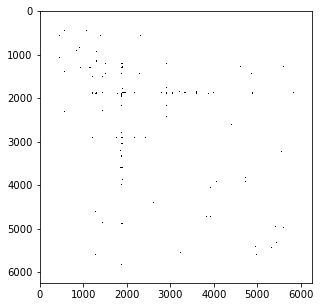

In [4]:
G=Network['2019-11-25']
draw_adjacency_matrix(G)

In [5]:
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

In [13]:
adjacency_matrix = nx.to_numpy_array(G,weight=None)

In [16]:
mat=adjacency_matrix
mat

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
sum(mat[156])

2.0

In [83]:
def NODF_naive(Matrix):
    N=len(Matrix)
    nrows=0
    for i in tqdm(range(N)): #first row
        for j in range(i+1,N): #second row
            if sum(Matrix[j])<sum(Matrix[i]):    
                onecount=0
                paircount=0
                for pair in range(N):
                    if Matrix[j][pair]==1:
                        onecount+=1
                        if Matrix[i][pair]==1:
                            paircount+=1
                npaired=paircount/onecount
                              
                nrows=nrows+npaired  
        
    return 2*nrows/(N*(N-1))
       

In [30]:
N_Rows(mat)

100%|████████████████████████████████████████████████████████████████████████████| 6245/6245 [9:01:43<00:00,  5.20s/it]


0.0

In [80]:
def NODF_NULL(Matrix):
    N=len(Matrix)
    nrows=0
    for i in tqdm(range(N)): #first row
        
        for j in range(i+1,N): #second row
            if sum(Matrix[j])<sum(Matrix[i]): 
                onecount=0
                paircount=0
                for pair in range(N):
                    if Matrix[j][pair]==1:
                        onecount+=1
                        if Matrix[i][pair]==1:
                            paircount+=1
                            
                npaired=(paircount-(sum(Matrix[j])*sum(Matrix[i])/N))/(onecount*(N-1))
                              
                nrows=nrows+npaired  
    
    return 2*nrows/N
        

In [32]:
NODF_NULL(mat)

100%|████████████████████████████████████████████████████████████████████████████| 6245/6245 [8:48:41<00:00,  5.08s/it]


-1.6426014865138552e-11

In [112]:
G=Network['2018-01-25']
adjacency_matrix = nx.to_numpy_array(G,weight=None)
mat2=adjacency_matrix

C:\Users\wyw25\AppData\Local\Temp/ipykernel_30556/2987955884.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


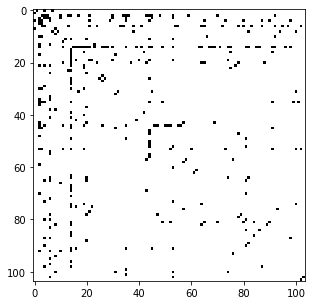

In [113]:
draw_adjacency_matrix(G)

C:\Users\wyw25\AppData\Local\Temp/ipykernel_30556/2987955884.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


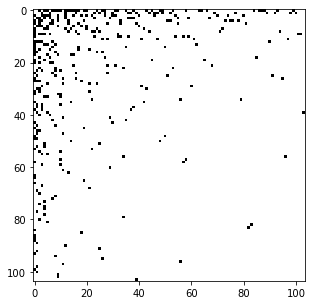

In [114]:
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

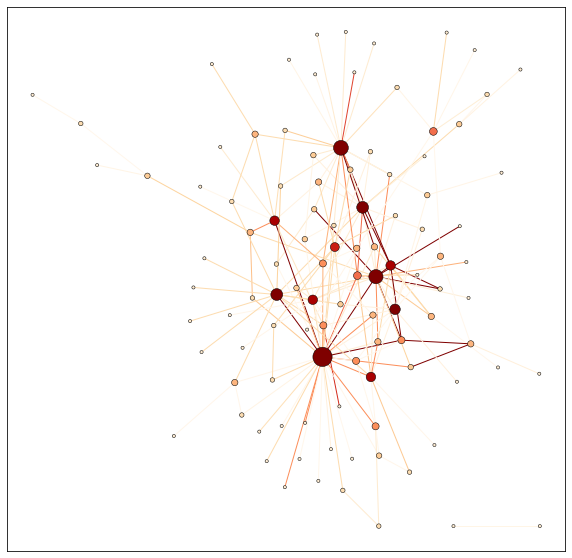

In [115]:
pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G.degree)
weights = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_color=weights.values(),edge_cmap=plt.cm.OrRd,edge_vmin=1,edge_vmax=1000000)


plt.show()

In [76]:
N_Rows(mat2)

100%|████████████████████████████████████████████████████████████████████████████| 6345/6345 [8:53:15<00:00,  5.04s/it]


0.017989090416306367

In [77]:
NODF_NULL(mat2)

100%|███████████████████████████████████████████████████████████████████████████| 6345/6345 [11:20:27<00:00,  6.43s/it]


0.03422166345025948

In [84]:
NODF={}
NODF_null={}
for day in ['2018-01-12','2018-01-25','2018-03-02','2018-03-31','2018-09-21', '2019-01-29','2019-12-20', '2021-01-05','2021-05-24','2021-08-26','2021-11-25']:
    G=Network[day]
    adjacency_matrix = nx.to_numpy_array(G,weight=None)
    NODF[day]=NODF_naive(adjacency_matrix)
    NODF_null[day]=NODF_NULL(adjacency_matrix)

  0%|                                                                           | 1/15659 [02:19<604:47:14, 139.05s/it]


KeyboardInterrupt: 

In [85]:
NODF

{'2018-01-12': 0.0,
 '2018-01-25': 0.10181553209465827,
 '2018-03-02': 0.06208283416824107,
 '2018-03-31': 0.055897230433591606,
 '2018-09-21': 0.04371141084686954,
 '2019-01-29': 0.03567033259515822,
 '2019-12-20': 0.035978180832612734,
 '2021-01-05': 0.026249774783289038,
 '2021-05-24': 0.022878008846444017}

In [86]:
NODF_null

{'2018-01-12': 0.0,
 '2018-01-25': 0.06748307963300383,
 '2018-03-02': 0.053704742535418015,
 '2018-03-31': 0.05052854174486239,
 '2018-09-21': 0.04032787208916918,
 '2019-01-29': 0.03308853003284774,
 '2019-12-20': 0.03422166345025948,
 '2021-01-05': 0.025203423522318982,
 '2021-05-24': 0.022183161659381893}

In [90]:
NODF_small={}
NODF_null_small={}
for day in ['2018-01-12','2018-01-14','2018-01-15','2018-01-16','2018-01-17',
            '2018-01-18','2018-01-19','2018-01-20','2018-01-21','2018-01-22','2018-01-23','2018-01-24',
            '2018-01-25','2018-01-26','2018-01-27','2018-01-28','2018-01-29','2018-01-30','2018-01-31', 
            '2018-02-01','2018-02-02','2018-02-03','2018-02-04','2018-02-05','2018-02-06','2018-02-07',
            '2018-02-08','2018-02-09','2018-02-10','2018-02-11','2018-02-12','2018-02-13','2018-02-14',
            '2018-02-15','2018-02-16','2018-02-17','2018-02-18','2018-02-19','2018-02-20','2018-02-21',
            '2018-02-22','2018-02-23','2018-02-24','2018-02-25','2018-02-26','2018-02-27','2018-02-28',
            '2018-03-01', '2018-03-02','2018-03-05','2018-03-20','2018-04-01']:
    G=Network[day]
    adjacency_matrix = nx.to_numpy_array(G,weight=None)
    NODF_small[day]=NODF_naive(adjacency_matrix)
    NODF_null_small[day]=NODF_NULL(adjacency_matrix)

100%|██████████████████████████████████████████████████████████████████████████████| 1028/1028 [04:13<00:00,  4.05it/s]


In [91]:
NODF_small

{'2018-01-12': 0.0,
 '2018-01-14': 0.0,
 '2018-01-15': 0.06666666666666667,
 '2018-01-16': 0.11904761904761904,
 '2018-01-17': 0.08888888888888889,
 '2018-01-18': 0.14102564102564102,
 '2018-01-19': 0.12738095238095237,
 '2018-01-20': 0.09741379310344829,
 '2018-01-21': 0.10882464096749814,
 '2018-01-22': 0.11689210567948109,
 '2018-01-23': 0.11609003676800288,
 '2018-01-24': 0.10809254904952034,
 '2018-01-25': 0.10181553209465827,
 '2018-01-26': 0.09304126507516332,
 '2018-01-27': 0.09044044959661637,
 '2018-01-28': 0.08720543046373473,
 '2018-01-29': 0.07687182836228396,
 '2018-01-30': 0.07233670538821337,
 '2018-01-31': 0.07237829681408743,
 '2018-02-01': 0.06724934657692873,
 '2018-02-02': 0.0664069261732481,
 '2018-02-03': 0.05994590866506706,
 '2018-02-04': 0.05921709150850094,
 '2018-02-05': 0.05351614945867837,
 '2018-02-06': 0.04916009639481626,
 '2018-02-07': 0.04386369722329564,
 '2018-02-08': 0.0405815917260785,
 '2018-02-09': 0.05842711904854453,
 '2018-02-10': 0.095473950

In [92]:
NODF_null_small

{'2018-01-12': 0.0,
 '2018-01-14': 0.0,
 '2018-01-15': -0.05555555555555556,
 '2018-01-16': -0.01700680272108843,
 '2018-01-17': -0.06888888888888887,
 '2018-01-18': -0.01676528599605523,
 '2018-01-19': 0.03395691609977327,
 '2018-01-20': 0.02607015457788348,
 '2018-01-21': 0.039203829680020195,
 '2018-01-22': 0.05343438078314067,
 '2018-01-23': 0.06862299345350148,
 '2018-01-24': 0.07230735204730443,
 '2018-01-25': 0.06748307963300383,
 '2018-01-26': 0.06147061414226161,
 '2018-01-27': 0.0614637971494785,
 '2018-01-28': 0.06060731792812354,
 '2018-01-29': 0.05219082778117946,
 '2018-01-30': 0.04934454716049445,
 '2018-01-31': 0.04993400875403444,
 '2018-02-01': 0.04660084551640444,
 '2018-02-02': 0.04632287999590912,
 '2018-02-03': 0.04108785961633016,
 '2018-02-04': 0.04070704648961682,
 '2018-02-05': 0.03623538575502029,
 '2018-02-06': 0.03327673471180533,
 '2018-02-07': 0.029701115482437947,
 '2018-02-08': 0.02735782536348035,
 '2018-02-09': 0.04607169837209812,
 '2018-02-10': 0.08

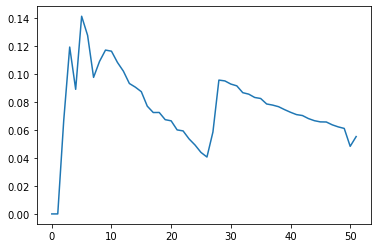

In [94]:
plt.plot(NODF_small.values())

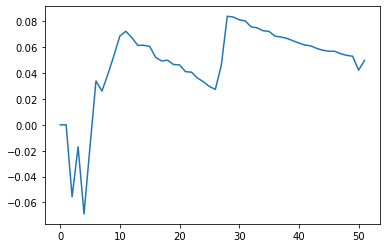

In [95]:
plt.plot(NODF_null_small.values())

In [3]:
def NODF(M):
    '''
    function to calculate the nestedness by overlap and decreasing fill (NODF).
    Metric developed by Almeida-Neto et al., 2008.

    Inputs:
    ----------
        M: array
            An matrix to which I want to calculate the NODF
    
    output:
    ----------
    NODF: number
        The NODF score for the whole matrix
    '''
    rw,cl=M.shape
    colN=np.zeros((cl,cl))
    rowN=np.zeros((rw,rw))
    
    #Find NODF column score
    for i in range(cl-1): # at a left position with respect to column j
      	for j in range(i+1,cl):
              #if (i!=j):
            if (np.sum(M[:,i])>np.sum(M[:,j]))&(np.sum(M[:,j])>0): # DF =! to zero, then NP =! to zero
                colN[i,j]=(M[:,i]*M[:,j]).sum()/(np.sum(M[:,j]))
    
#    NODF_COL = (2*np.sum(colN)/(cl*(cl-1)))*100
    
    #Find NODF row score
    for i in range(rw-1): #at an upper position with respect to row j
        for j in range(i+1,rw):
            #if (i!=j):
            if (np.sum(M[i,:])>np.sum(M[j,:]))&(np.sum(M[j,:])>0): # DF =! to zero, then NP =! to zero
                rowN[i,j]=(M[i,:]*M[j,:]).sum()/(np.sum(M[j,:]))
    
#    NODF_ROW = (2*np.sum(rowN)/(rw*(rw-1)))*100
    
    #Find NODF
    NODF=(2*(np.sum(rowN)+np.sum(colN))/(cl*(cl-1) + rw*(rw-1) ))
    return  NODF
#%%
def spectral_radius(M):    
    """
    Spectral Radius described in Staniczenko et al., 2013
    INPUT: 
        M: array
            the bipartite biadjacency matrix
    OUTPUT: 
    - spectral radius.
  
    """
    #build the adajacency matrix
    r,cl=M.shape
    ntotal=r+cl
    theta_ik=np.zeros((ntotal,ntotal))
    theta_ik[0:r,r::]=M;
    theta_ik[r::,0:r]=M.T;  
    max_eig = max(np.abs(np.linalg.eig(theta_ik)[0].real))
    return max_eig
#%%
def glob_nestnulb(M):
    '''
    function to calculate the nestedness fitness N, a modified version
    of Ñ, corrected by a null model
    Metric developed by ASR et al, PRE 2018.

    Inputs:n
    ----------
        M: array
            A matrix to which I want to calculate the N
    
    output:
    ----------
    N: number
        The N score for the whole matrix
    '''
    rw,cl=M.shape
    colN=np.zeros((cl,cl))
    rowN=np.zeros((rw,rw))
    cols_degr = M.sum(axis=0) # dregree of the cols nodes
    rows_degr = M.sum(axis=1) # degree of the rows nodes
    
    #Find N col score
    for i in range(cl): # at a left position with respect to column j
      	for j in range(cl):
              if M[i,j]==1:
                if (cols_degr[i]>=cols_degr[j]) & (cols_degr[j]>0): # heaviside
                    if (cols_degr[i]==cols_degr[j]):
                          colN[i,j]=(np.sum((M[:,i]*M[:,j]),dtype=float)-((cols_degr[i]*cols_degr[j])/rw))/(2*cols_degr[j]) #paired overlap
                    else:
                          colN[i,j]=(np.sum((M[:,i]*M[:,j]),dtype=float)-((cols_degr[i]*cols_degr[j])/rw))/cols_degr[j]
        
    N_COL = (np.sum(colN,dtype=float)/(cl-1))
    
    for i in range(rw): #at an upper position with respect to row j
        for j in range(rw):
            if M[i,j]==1:
                if (rows_degr[i]>=rows_degr[j]) & (rows_degr[j]>0): # Heaviside
                    if (rows_degr[i]==rows_degr[j]):
                        rowN[i,j]=(np.sum((M[i,:]*M[j,:]),dtype=float)-((rows_degr[i]*rows_degr[j])/cl))/(2*rows_degr[j]) #paired overlap
                    else:
                        rowN[i,j]=(np.sum((M[i,:]*M[j,:]),dtype=float)-((rows_degr[i]*rows_degr[j])/cl))/rows_degr[j] #paired overlap

    N_ROW = (np.sum(rowN,dtype=float)/(rw-1))
    
    #Find N
    N=(N_COL+N_ROW)*(2./(rw+cl))
    return N
#%%
def glob_nestnul(M):
    '''
    function to calculate the nestedness fitness N, a modified version
    of Ñ, corrected by a null model
    Metric developed by ASR et al, PRE 2018.

    Inputs:n
    ----------
        M: array
            A matrix to which I want to calculate the N
    
    output:
    ----------
    N: number
        The N score for the whole matrix
    '''
    rw,cl=M.shape
    colN=np.zeros((cl,cl))
    cols_degr = M.sum(axis=0) # dregree of the cols nodes
    
    #Find N col score
    for i in range(cl): # at a left position with respect to column j
      	for j in range(cl):
              if (cols_degr[i]>=cols_degr[j]) & (cols_degr[j]>0): # heaviside
                if (cols_degr[i]==cols_degr[j]):
                      colN[i,j]=(np.sum((M[:,i]*M[:,j]),dtype=float)-((cols_degr[i]*cols_degr[j])/rw))/(2*cols_degr[j]) #paired overlap
                else:
                      colN[i,j]=(np.sum((M[:,i]*M[:,j]),dtype=float)-((cols_degr[i]*cols_degr[j])/rw))/cols_degr[j]
    
    N_COL = (np.sum(colN,dtype=float)/(cl-1))
        
    #Find N
    N=(N_COL)*(2./(cl))
    return N

In [4]:
NODF_small_new={}
NODF_null_small_new={}
for day in ['2018-01-12','2018-01-14','2018-01-15','2018-01-16','2018-01-17',
            '2018-01-18','2018-01-19','2018-01-20','2018-01-21','2018-01-22','2018-01-23','2018-01-24',
            '2018-01-25','2018-01-26','2018-01-27','2018-01-28','2018-01-29','2018-01-30','2018-01-31', 
            '2018-02-01','2018-02-02','2018-02-03','2018-02-04','2018-02-05','2018-02-06','2018-02-07',
            '2018-02-08','2018-02-09','2018-02-10','2018-02-11','2018-02-12','2018-02-13','2018-02-14',
            '2018-02-15','2018-02-16','2018-02-17','2018-02-18','2018-02-19','2018-02-20','2018-02-21',
            '2018-02-22','2018-02-23','2018-02-24','2018-02-25','2018-02-26','2018-02-27','2018-02-28',
            '2018-03-01', '2018-03-02','2018-03-05','2018-03-20','2018-04-01']:
    G=Network[day]
    adjacency_matrix = nx.to_numpy_array(G,weight=None)
    NODF_small_new[day]=NODF(adjacency_matrix)
    NODF_null_small_new[day]=glob_nestnul(adjacency_matrix)

In [5]:
NODF_small_new

{'2018-01-12': 0.0,
 '2018-01-14': 0.0,
 '2018-01-15': 0.06666666666666667,
 '2018-01-16': 0.11904761904761904,
 '2018-01-17': 0.08888888888888889,
 '2018-01-18': 0.14102564102564102,
 '2018-01-19': 0.12738095238095237,
 '2018-01-20': 0.09741379310344826,
 '2018-01-21': 0.10882464096749811,
 '2018-01-22': 0.11689210567948108,
 '2018-01-23': 0.11609003676800286,
 '2018-01-24': 0.10809254904952047,
 '2018-01-25': 0.1018155320946583,
 '2018-01-26': 0.09304126507516337,
 '2018-01-27': 0.09044044959661636,
 '2018-01-28': 0.08720543046373465,
 '2018-01-29': 0.0768718283622839,
 '2018-01-30': 0.07233670538821325,
 '2018-01-31': 0.07237829681408732,
 '2018-02-01': 0.06724934657692867,
 '2018-02-02': 0.06640692617324809,
 '2018-02-03': 0.05994590866506708,
 '2018-02-04': 0.05921709150850096,
 '2018-02-05': 0.05351614945867836,
 '2018-02-06': 0.049160096394816284,
 '2018-02-07': 0.043863697223295695,
 '2018-02-08': 0.040581591726078566,
 '2018-02-09': 0.05842711904854459,
 '2018-02-10': 0.095473

In [6]:
NODF_null_small_new

{'2018-01-12': 0.0,
 '2018-01-14': 0.0,
 '2018-01-15': 0.011111111111111144,
 '2018-01-16': 0.010204081632653086,
 '2018-01-17': 0.01333333333333333,
 '2018-01-18': 0.04404996712689021,
 '2018-01-19': 0.128140589569161,
 '2018-01-20': 0.10869854481626183,
 '2018-01-21': 0.13897707231040565,
 '2018-01-22': 0.13229784071551826,
 '2018-01-23': 0.14174289301407944,
 '2018-01-24': 0.13948712349012612,
 '2018-01-25': 0.1366583291200543,
 '2018-01-26': 0.11596144323329997,
 '2018-01-27': 0.1131458520301748,
 '2018-01-28': 0.11206207000933108,
 '2018-01-29': 0.09834568115936602,
 '2018-01-30': 0.09429246264074986,
 '2018-01-31': 0.09509935759646365,
 '2018-02-01': 0.08785641003575459,
 '2018-02-02': 0.08683962595356602,
 '2018-02-03': 0.07826679259821974,
 '2018-02-04': 0.07696369676856744,
 '2018-02-05': 0.06933588416873672,
 '2018-02-06': 0.06349088508581881,
 '2018-02-07': 0.06091448771068217,
 '2018-02-08': 0.05832900467303787,
 '2018-02-09': 0.08066207948568246,
 '2018-02-10': 0.138381100

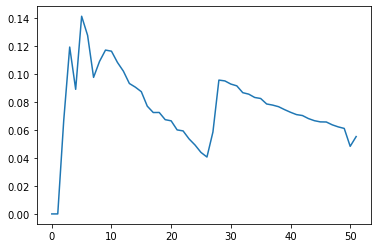

In [7]:
plt.plot(NODF_small_new.values())

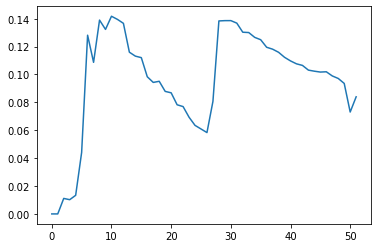

In [8]:
plt.plot(NODF_null_small_new.values())

In [38]:
G_test=Network['2018-04-01']

In [ ]:
Visual_Graph(G_test):

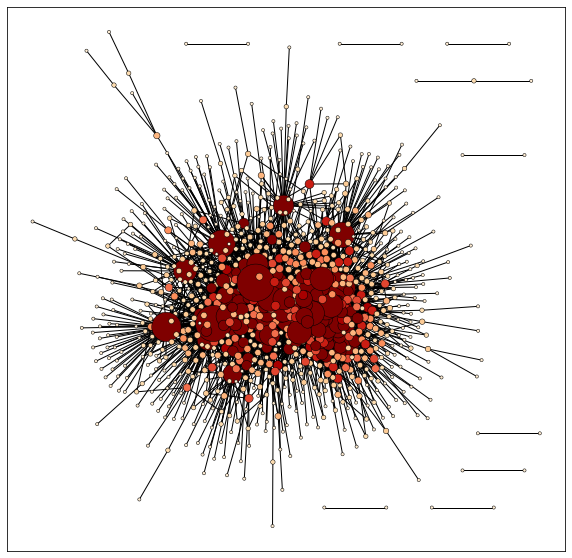

In [40]:
pos = nx.nx_agraph.graphviz_layout(G_test, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G_test.degree)
weights = nx.get_edge_attributes(G_test,'weight')
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(G_test,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G_test,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_cmap=plt.cm.OrRd)


plt.show()

In [55]:
G = nx.configuration_model(dict(G_test.degree()).values())

In [44]:
G = nx.random_degree_sequence_graph(dict(G_test.degree()).values(), seed=42)
sorted(d for n, d in G.degree())

KeyboardInterrupt: 

In [48]:
G = nx.expected_degree_graph(dict(G_test.degree()).values())

In [52]:
G=nx.havel_hakimi_graph(dict(G_test.degree()).values(), create_using=None)

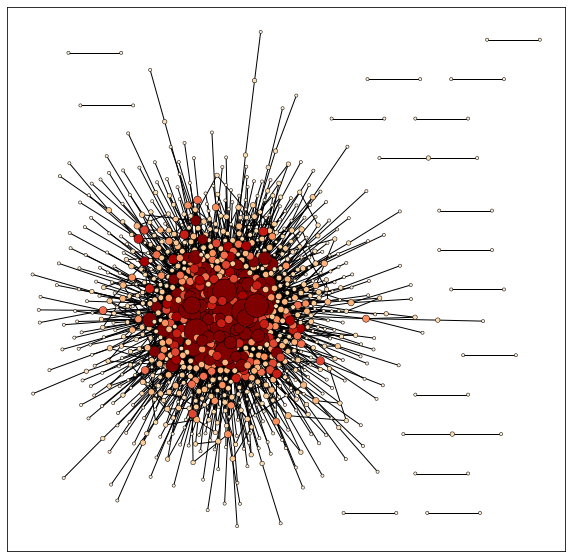

In [56]:
Visual_Graph(G)

In [46]:
def Visual_Graph(G):
    pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
    #pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
    d = dict(G.degree)
    weights = nx.get_edge_attributes(G,'weight')
    plt.figure(3,figsize=(10,10)) 
    nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
    nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_cmap=plt.cm.OrRd)

    plt.show()

In [54]:
 NODF(nx.to_numpy_array(G,weight=None))

0.011063295893985137

In [ ]:
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())

In [ ]:
draw_adjacency_matrix(G,nodenewlist)

In [9]:
def assignmentArray_to_lists(assignment_array):
    by_attribute_value = defaultdict(list)
    for node_index, attribute_value in enumerate(assignment_array):
        by_attribute_value[attribute_value].append(node_index)
    return by_attribute_value.values()


In [ ]:
# Load in array which maps node index to dorm number
# Convert this to a list of lists indicating dorm membership
dorm_assignment = np.genfromtxt("caltech_dorms_blanksInferred.txt", dtype="u4")
dorm_lists = assignmentArray_to_lists(dorm_assignment)

# Create a list of all nodes sorted by dorm, and plot
# adjacency matrix with this ordering
nodes_dorm_ordered = [node for dorm in dorm_lists for node in dorm]
draw_adjacency_matrix(G, nodes_dorm_ordered, [dorm_lists],["blue"])

In [ ]:
year_assignment = np.genfromtxt("caltech_years_blanksInferred.txt", dtype="u4")
year_lists = assignmentArray_to_lists(year_assignment)
nodes_year_ordered = [node for year_list in year_lists for node in year_list]
pyplot.clf()
draw_adjacency_matrix(G, nodes_year_ordered, [year_lists],["blue"])

In [ ]:
node2year = dict(enumerate(year_assignment))
dormYear_lists = []
for dorm in dorm_lists:
    nodes_by_year = defaultdict(list)
    for node in dorm:
        nodes_by_year[node2year[node]].append(node)
    for year in sorted(nodes_by_year.keys()):
        dormYear_lists.append(nodes_by_year[year])

nodes_dormYear_ordered = [node for dormYear in dormYear_lists for node in dormYear]
draw_adjacency_matrix(G, nodes_dormYear_ordered, [dorm_lists, dormYear_lists], ["blue", "red"])

In [10]:


# Run louvain community finding algorithm
louvain_community_dict = louvain.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.iteritems():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["blue"])

AttributeError: module 'louvain' has no attribute 'best_partition'

In [ ]:
G.degree